In [1]:
import ipywidgets as ipw
from IPython.display import display

from stochastic_repro import start_pool
from stochastic_models import model_seir
from stochastic_tests import Test

t_fin = 100.0
num_steps = 100

test = Test(model=model_seir(),
            t_fin=t_fin,
            num_steps=num_steps,
            sample_times=[t_fin / num_steps * i for i in range(1, num_steps + 1)],
            trials=[10, 100, 1000, 10000],
            stochastic=True)

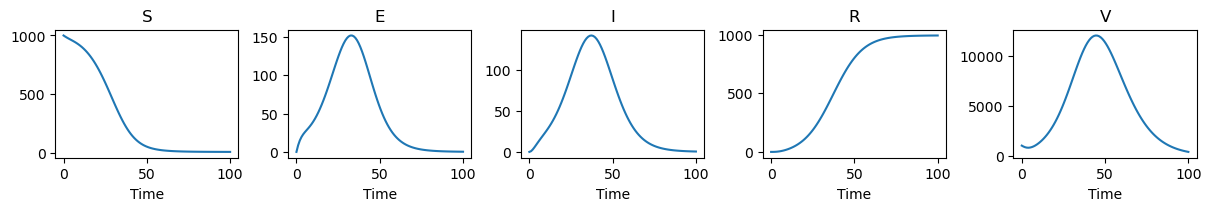

In [2]:
test.execute_deterministic()
_ = test.plot_results_deterministic()

Stochastic simulation results can be treated as a distribution with statistical properties such as mean and standard deviation. Distributions should become smooth with increasing number of trials. 

In [3]:
label, out = ipw.Label(), ipw.Output()
display(out)
with out:
    display(label)

start_pool()
test.execute_stochastic(label)
_ = out.clear_output()

Output()

We should find that results distributions become smooth as the number of trials increases. 

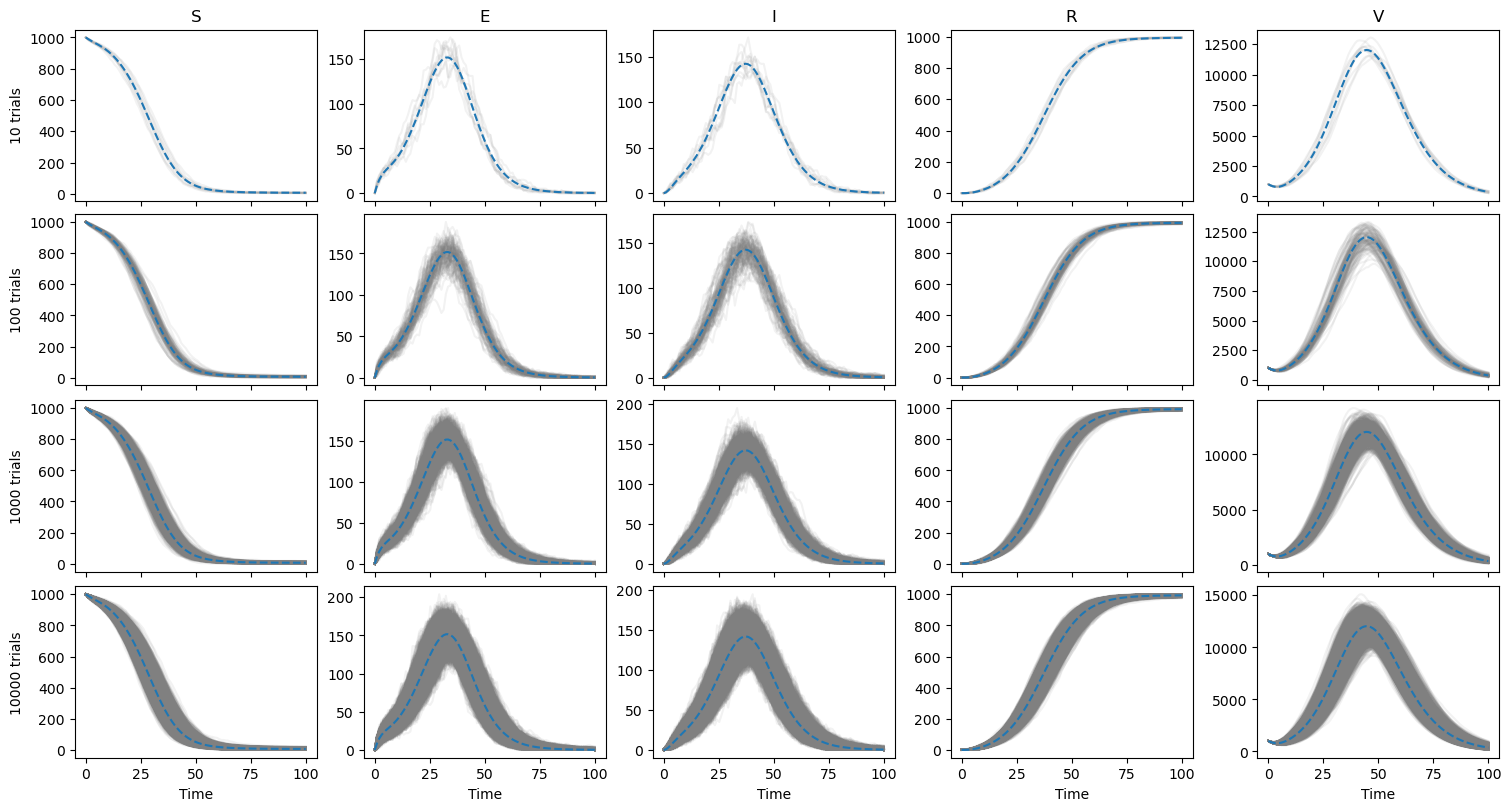

In [4]:
_ = test.plot_results_stochastic()

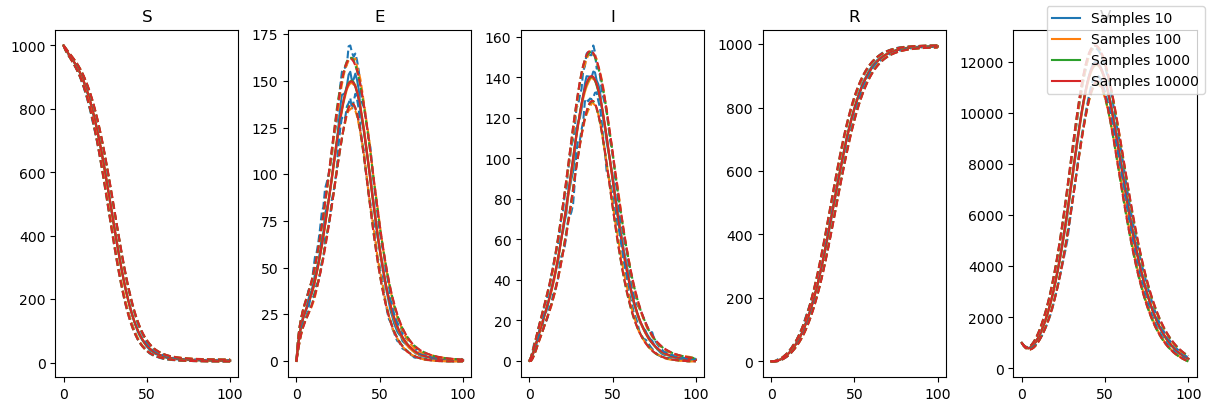

In [5]:
_ = test.plot_stats()

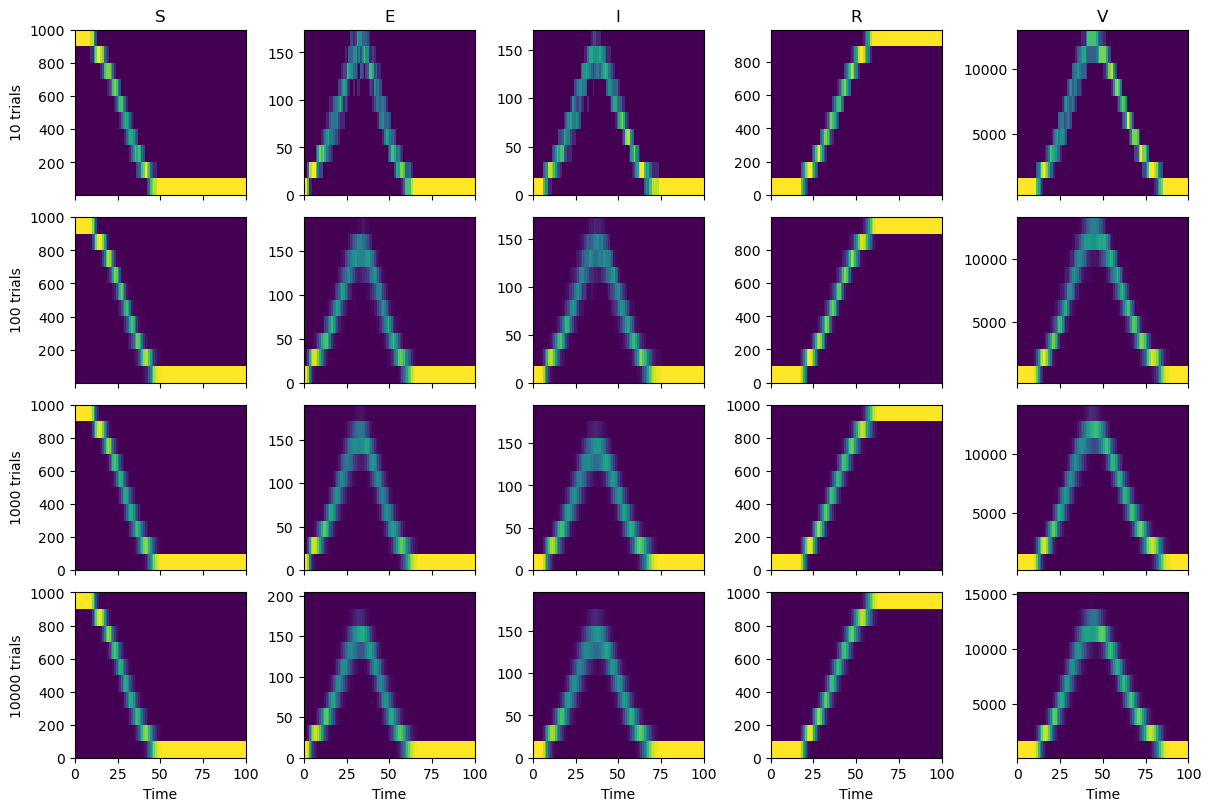

In [6]:
_ = test.plot_distributions()

Results distributions should converge as the number of trials increases. At any sampled simulation time, convergence appears as a distribution that converges with increasing number of trials. Convergence can be quantified by measuring the change in distribution for an increase in number of trials. We should find that the change in distribution goes to zero everywhere as the number of trials increases. 

In [7]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.0])

In [8]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_diff_basic(filter=0.05, progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_basic[0.05])

In [9]:
# progress_bar, out = ipw.IntProgress(), ipw.Output()
# progress_bar.max = (len(test.trials) - 1) * len(test.model.results_names)
# display(out)

# with out:
#     label = ipw.Label(value='Calculating differences...')
#     vbox = ipw.VBox([label, progress_bar])
#     display(vbox)

# test.measure_dist_div_kldiv(progress_bar=progress_bar)
# out.clear_output()

# _ = test.plot_dist_diff(test.acc_diff_kl_div)

In [10]:
# out = ipw.Output()
# display(out)

# with out:
#     print('Analyzing correlations...')
# test.measure_correlation()
# out.clear_output()

# _ = test.plot_correlations()

In [11]:
test.find_ecfs()
test.measure_ecf_diffs()

In [12]:
for t in test.trials:
    ecf_ks_stat_t = {n: -1 for n in test.model.results_names}
    for ks in test.ecf_ks_stat[t]:
        for n, ks_stat in ks.items():
            ecf_ks_stat_t[n] = max(ecf_ks_stat_t[n], ks_stat)
    print(f'{t} trials')
    for n, ks_stat in ecf_ks_stat_t.items():
        print(f'\t{n}: {ks_stat}')

10 trials
	S: 1.6531785769460758
	E: 1.599465589974847
	I: 1.845207198101771
	R: 1.5857869438642875
	V: 1.7163387223679372
100 trials
	S: 0.5970921585340756
	E: 0.5716027503423873
	I: 0.5728414472970406
	R: 0.5634423261045352
	V: 0.531413450971751
1000 trials
	S: 0.17908705362827174
	E: 0.2025036363708893
	I: 0.1822042903421669
	R: 0.1773288247230718
	V: 0.18115871814081508
10000 trials
	S: 0.05630951220155427
	E: 0.05873012786672796
	I: 0.05967192873877847
	R: 0.06422567775899561
	V: 0.0655679890716576


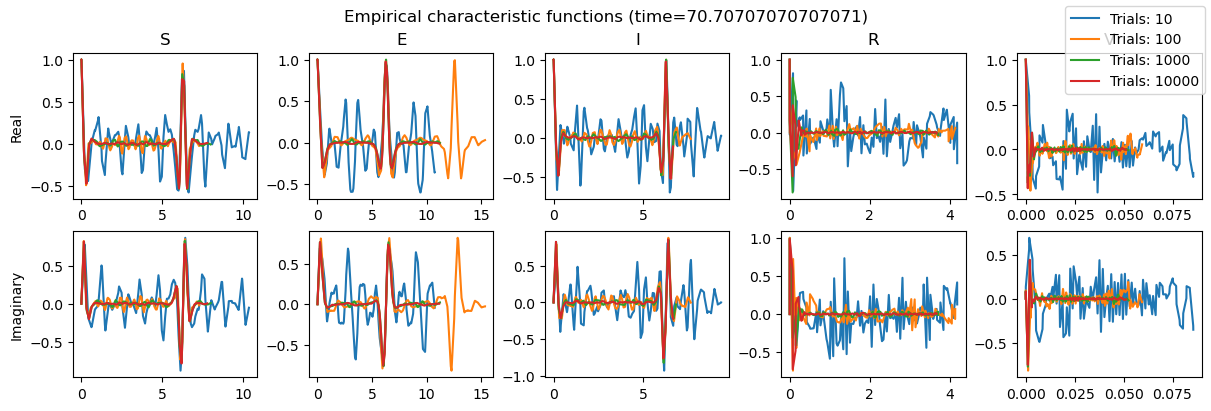

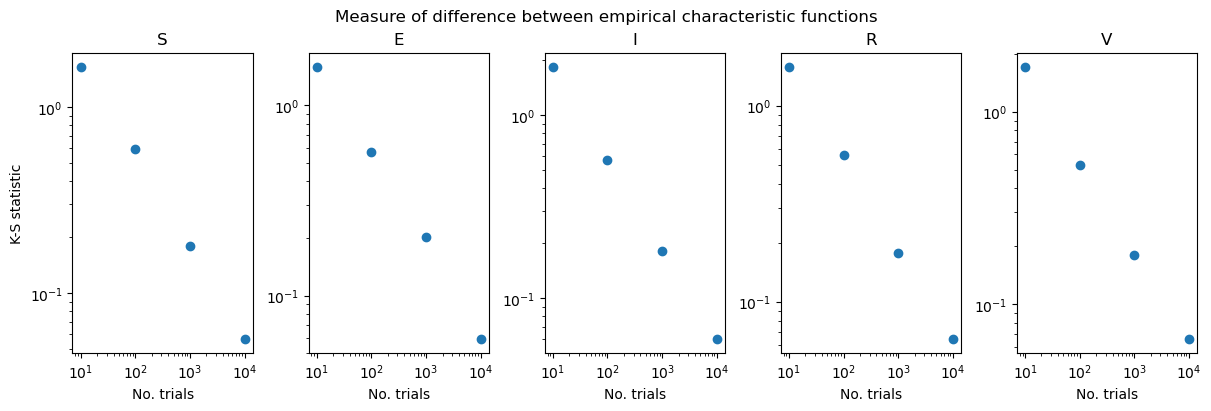

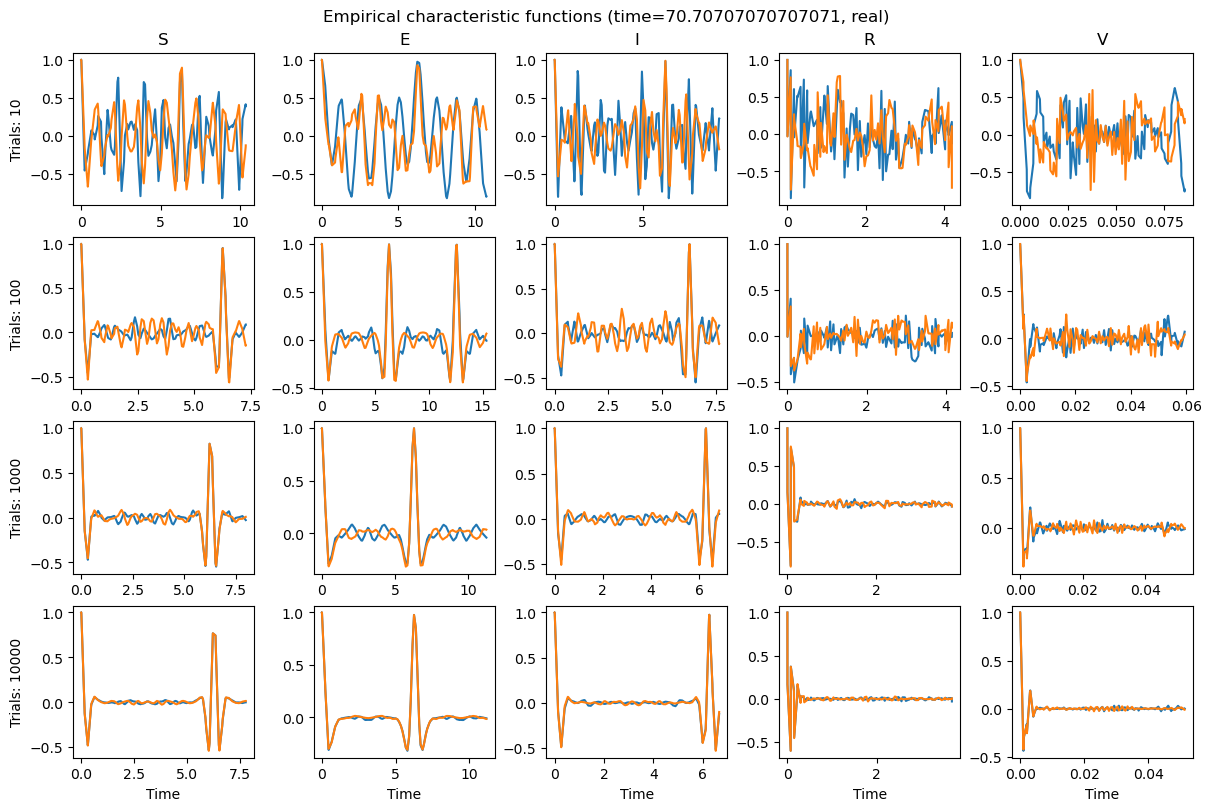

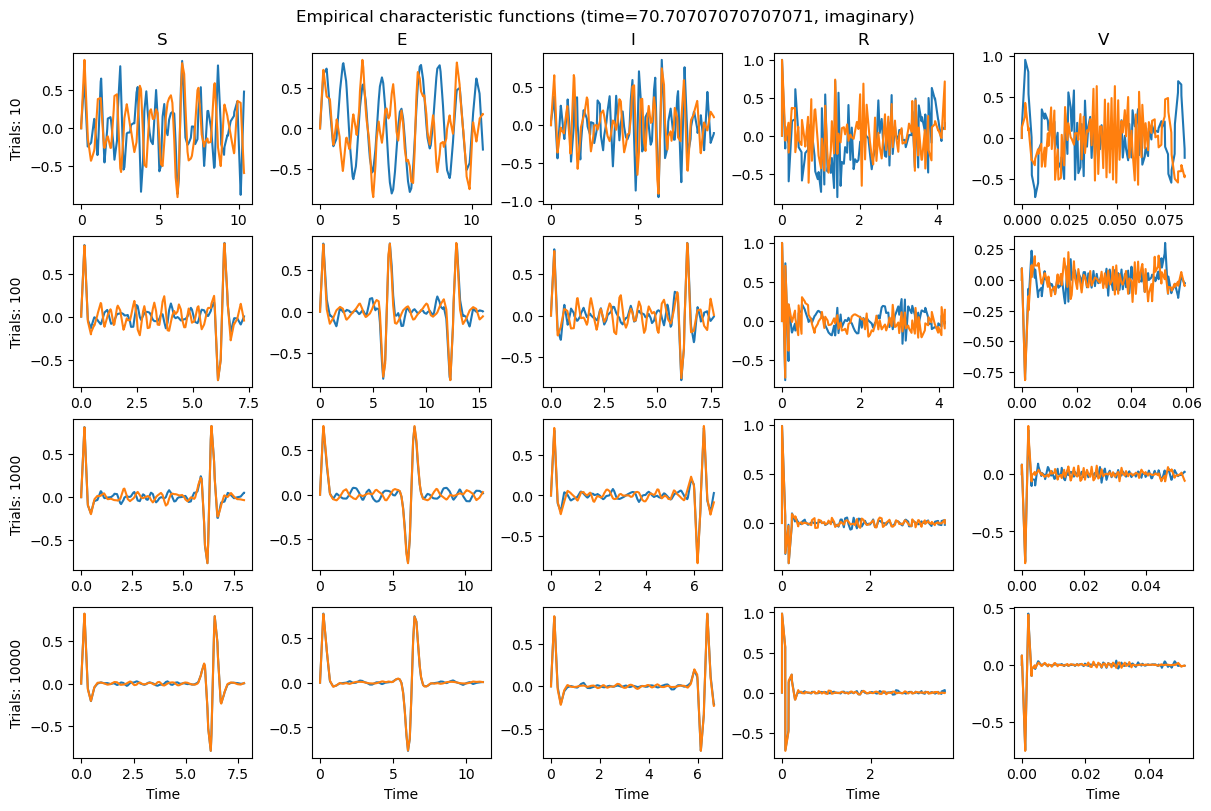

In [13]:
preview_time = test.max_ks_stat_time(test.trials[-1])
# preview_time = test.min_final_eval_time(test.trials[-1])

test.plot_ecf(time=preview_time)
test.plot_ecf_diffs()
_ = test.plot_ecf_comparison(time=preview_time)

In [14]:
test.generate_ecf_diff_fits()

/Users/timothy.sego/Desktop/Current/stochastic_repro/stochastic_repro.py:992: OptimizeWarning: Covariance of the parameters could not be estimated
  return curve_fit(fit_func, data_x, data_y, **kwargs)


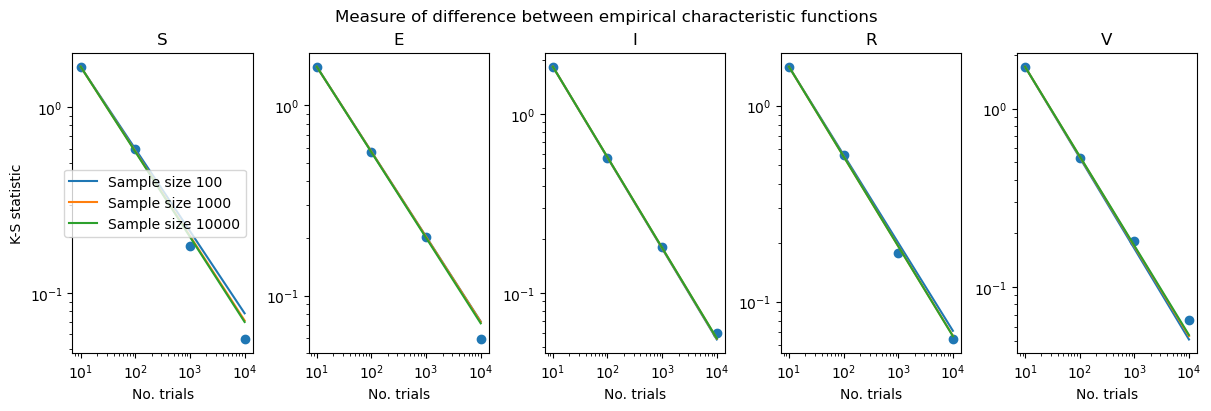

In [15]:
_, axs = test.plot_ecf_diff_fits(test.plot_ecf_diffs())
_ = axs[0].legend()

In [16]:
# Runtime: ~9 minutes (M1 max)
test.test_sampling(err_thresh=1E-3)

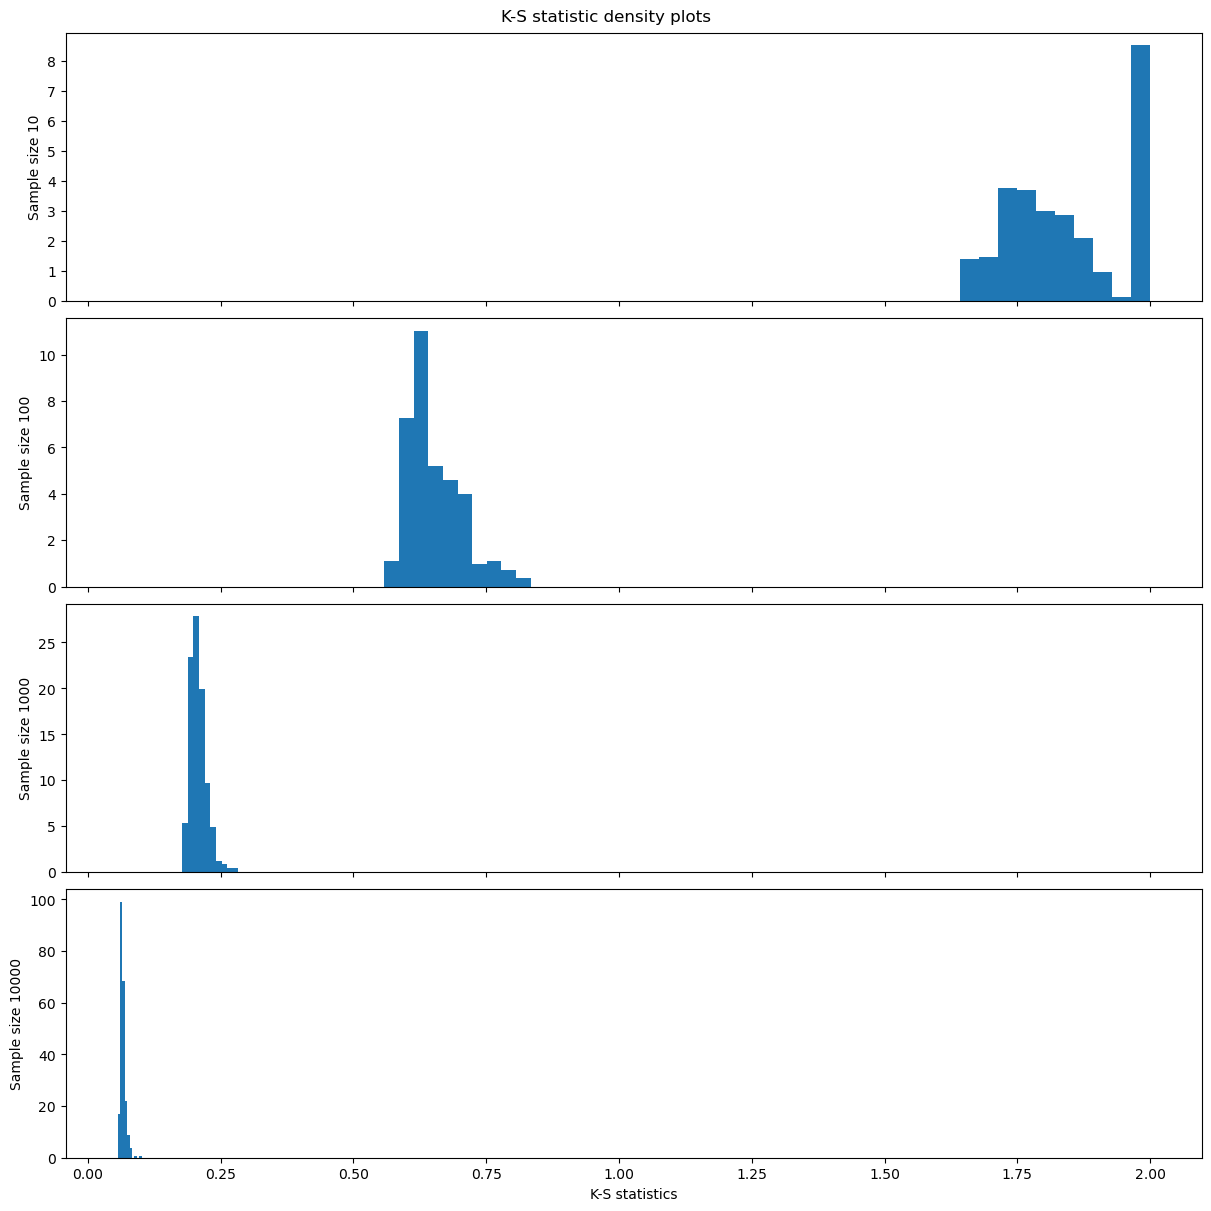

In [17]:
_ = test.plot_ks_sampling()

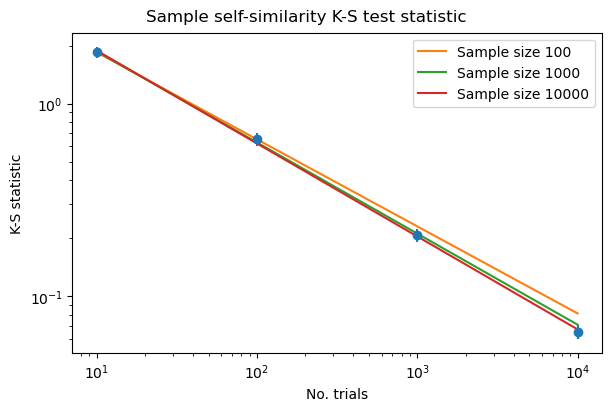

In [18]:
test.generate_ecf_sampling_fits()
_, ax = test.plot_ecf_sampling_fits(test.plot_ecf_sampling())
_ = ax.legend()